In [ ]:
# Instalação da Biblioteca
!pip install geopandas geobr rtree matplotlib-scalebar contextily cenpy tobler h3 cmasher descartes

In [ ]:
import geopandas as gpd
import rtree
import geobr
import warnings
import cmasher as cmr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Polygon, Point

import contextily as ctx
#from cenpy import products
from tobler.util import h3fy

In [ ]:
# analise de UCs nos municipios
muni = geobr.read_municipality(code_muni='PA', year=2020)
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1500107.0,Abaetetuba,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.83139 -1.56352, -48.82785 ..."
1,1500131.0,Abel Figueiredo,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.56310 -4.82660, -48.54916 ..."
2,1500206.0,Acará,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.30974 -1.47028, -48.29302 ..."
3,1500305.0,Afuá,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.50553 0.18421, -50.48764 0..."
4,1500347.0,Água Azul Do Norte,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.81162 -6.27576, -50.80690 ..."


Empty GeoDataFrame
Columns: [code_muni, name_muni, code_state, abbrev_state, name_state, code_region, name_region, geometry]
Index: []


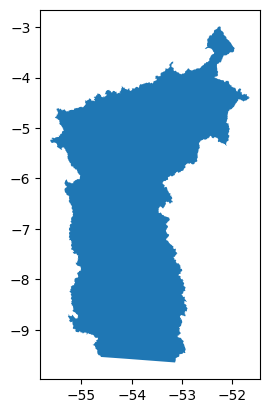

In [ ]:
# filtrando a base por municipio
gdf_muni = muni[muni.name_muni=='Altamira']
gdf_muni.plot()

print(muni[muni.geometry=='Altamira'])

In [ ]:
# Definindo o sistema de projeção
gdf_muni.crs = 'EPSG:4326'
gdf_muni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Unidades de conservação
uc_gdf = geobr.read_conservation_units(date=201909, simplified=True, verbose=False)
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [ ]:
# Definindo o sistema de projeção
uc_gdf.crs = 'EPSG:4326'
uc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Conferindo os sistemas
uc_gdf.crs == gdf_muni.crs

True

In [ ]:
# Filtrando os dados da cidade escolhida
uc_gdf_poa = gpd.sjoin(uc_gdf, gdf_muni)
uc_gdf_poa

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,date,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region
597,280,RESERVA EXTRATIVISTA RIO IRIRI,351830,Reserva Extrativista,US,federal,2006,1705,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 06/06/2006,...,201909.0,"MULTIPOLYGON (((-54.83621 -5.27956, -54.83647 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
616,1036,FLORESTA ESTADUAL DE IRIRI,None,Floresta,US,estadual,2006,1725,Aproximado (O poligono representa uma estimati...,Decreto nº 2606 de 07/12/2006,...,201909.0,"MULTIPOLYGON (((-54.47225 -5.83502, -54.46259 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
755,258,RESERVA EXTRATIVISTA RIOZINHO DO ANFRÍSIO,351785,Reserva Extrativista,US,federal,2004,1708,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 09/11/2004,...,201909.0,"MULTIPOLYGON (((-54.84139 -4.40990, -54.83803 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
898,265,FLORESTA NACIONAL DO TRAIRÃO,351816,Floresta,US,federal,2006,393,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 14/02/2006,...,201909.0,"MULTIPOLYGON (((-55.95134 -5.10400, -55.95037 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
966,267,PARQUE NACIONAL DO JAMANXIM,351814,Parque,PI,federal,2006,13477,Correto (O poligono corresponde ao memorial de...,Decreto nº 47570 de 14/02/2006,...,201909.0,"MULTIPOLYGON (((-55.64046 -5.03329, -55.63794 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
1050,1635,RESERVA EXTRATIVISTA RIO XINGU,None,Reserva Extrativista,US,federal,2008,2436,Correto (O poligono corresponde ao memorial de...,Decreto nº s/n de 05/06/2008,...,201909.0,"MULTIPOLYGON (((-52.69077 -4.34613, -52.67606 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
1064,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,201909.0,"MULTIPOLYGON (((-54.91714 -5.40260, -54.66432 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
1258,151,PARQUE NACIONAL DA SERRA DO PARDO,351712,Parque,PI,federal,2005,227,Correto (O poligono corresponde ao memorial de...,Decreto nº S/N de 17/02/2005,...,201909.0,"MULTIPOLYGON (((-52.87434 -5.56172, -52.85150 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
1325,1039,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,None,Área de Proteção Ambiental,US,estadual,2006,1810,Correto (O poligono corresponde ao memorial de...,Decreto nº 2.612 de 04/12/2006,...,201909.0,"MULTIPOLYGON (((-52.75757 -6.07716, -52.74260 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte
1378,47,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,351711,Estação Ecológica,PI,federal,2005,967,Correto (O poligono corresponde ao memorial de...,Decreto nº sem número de 17/02/2005,...,201909.0,"MULTIPOLYGON (((-53.44265 -5.68068, -53.56086 ...",7,1500602.0,Altamira,15.0,PA,Pará,1.0,Norte


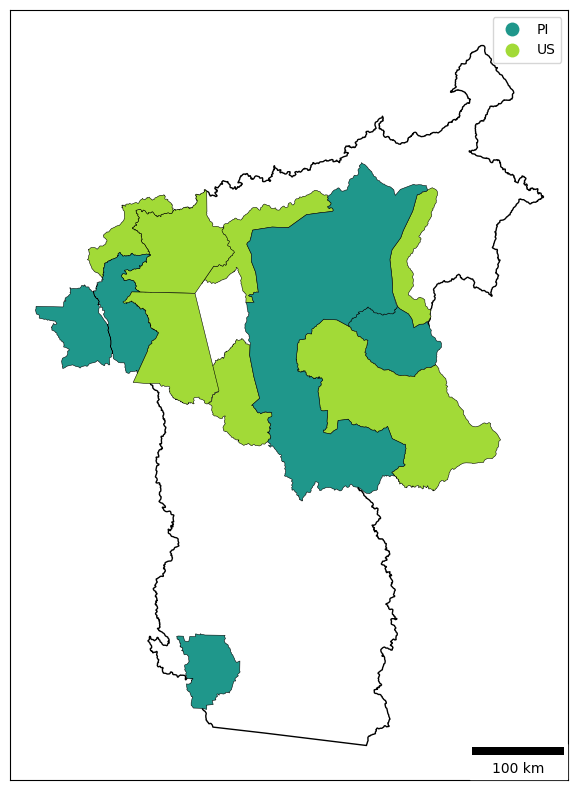

In [ ]:
# Plotando as bases

# PI - Proteção integral
# US - Uso sustentável

warnings.filterwarnings('ignore')

# passando o sistema de coordenadas da base para km (eixos)
uc_gdf_poa = uc_gdf_poa.to_crs(32619)
gdf_muni = gdf_muni.to_crs(32619)

fig, ax = plt.subplots(figsize=(10,10))
base= gdf_muni.plot(ax=ax, color='white', edgecolor='black')

# Remover os números e tracinhos dos eixos x e y
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

uc_gdf_poa.plot(ax=base, column='group', edgecolor='black', linewidth=0.38, legend=True, cmap=cmr.get_sub_cmap('viridis', 0.53, 0.86))
#ax.set_title('Unidades de Conservação \n Altamira - PA')
ax.add_artist(ScaleBar(1, location='lower right'))
plt.savefig("altamira_mapa.png", dpi=100)
plt.show()

Quantidade de células: 336


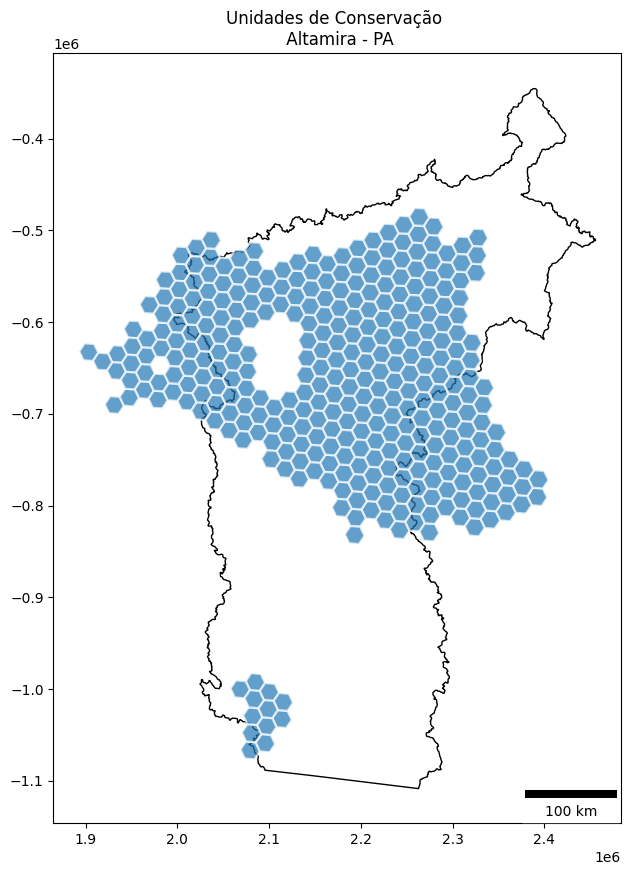

In [ ]:
warnings.filterwarnings('ignore')

# Gerando uma grade hexagonal cobrindo a face da unidade de conservação

dc_hex_large = h3fy(uc_gdf_poa, resolution=5, return_geoms=True)

fig, axs = plt.subplots(figsize=(10,10))
axs.set_title('Unidades de Conservação \n Altamira - PA')

axs.add_artist(ScaleBar(1, location='lower right'))

base= gdf_muni.plot(ax=axs, color='white', edgecolor='black')
dc_hex_large.plot(ax=axs, alpha=0.7, linewidth=1.6, edgecolor='white')

#ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
#ax.axis('off')

#print(dc_hex_large.size)
#print(dc_hex_large)
#print(dc_hex_large.index.values)

#for i in range(dc_hex_large.size):
#  print(list(dc_hex_large["geometry"][i].exterior.coords))

# coordenada de apenas 1 hexágono para testes
coord = list(dc_hex_large["geometry"][0].exterior.coords)

#print(coord)
#print()

# listas para armazenar as 6 coordenadas do hexágono de teste
x = []
y = []
for i,coord in enumerate(coord):
    if i == 6:
      break
    else:
      x.append(coord[0])
      y.append(coord[1])
      #plt.text(coord[0],coord[1],'s'+str(i+1),fontsize=7)  # label para cada vértice do hexagono (apenas para testes)

#print(x)
#print(y)

print(f"Quantidade de células: {dc_hex_large.size}")

#plt.plot(x, y, '-o')
#plt.show()

## Gerador 1


Cluster 1, Hexágono 27
Centroide do cluster 1: (2173823.2098143557, -669660.1717539165)

Coordenadas do centroide do cluster sorteado 1: [2173823.20981436 -669660.17175392]

Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1: 336 hexágonos
Cluster 1:
Distâncias dos drones:
  Drone 1: {'G0': 108334.96193940788, 'G1': 244809.20660872315, 'G2': 120344.08560597981, 'G3': 164949.50913725293, 'G4': 187918.7419224041, 'G5': 74585.9557799423, 'G6': 164104.4647795577, 'G7': 154883.54517709478, 'G8': 157374.36949995262, 'G9': 208206.4605651831, 'G10': 158204.26103106918, 'G11': 64874.42058298173, 'G12': 102225.71367122364, 'G13': 114199.98100461217, 'G14': 216487.053559733, 'G15': 42806.2677945254, 'G16': 208323.5535528996, 'G17': 138969.01065266208, 'G18': 178647.23304061245, 'G19': 75660.53477379956, 'G20': 1946

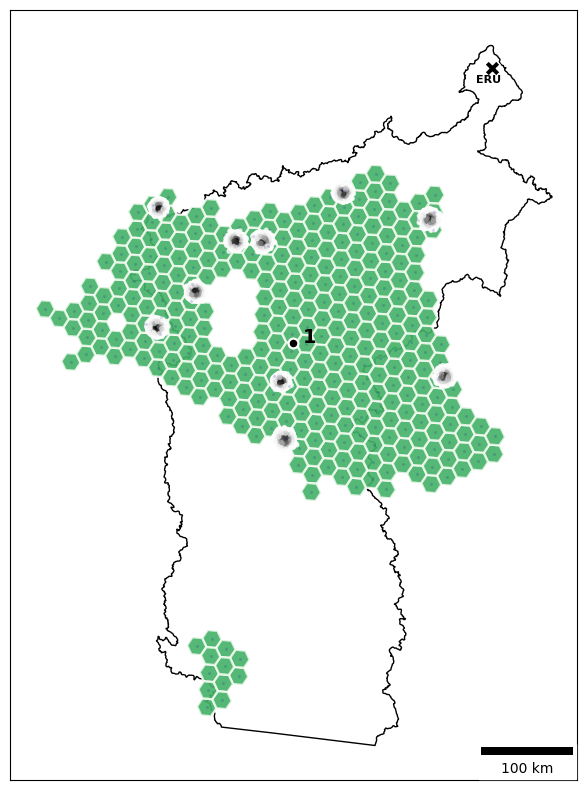

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset, inset_axes
import matplotlib.ticker as mtick
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import random

# Algoritmo de Bellman-Ford
def bellman_ford(graph, start, end):
    dist = {}
    pred = {}
    for node in graph:
        dist[node] = float('inf')
        pred[node] = None
    dist[start] = 0
    for i in range(len(graph)-1):
        for u in graph:
            for v, w in graph[u].items():
                if dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    pred[v] = u
    path = []
    node = end
    while node != start:
        path.append(node)
        node = pred[node]
    path.append(start)
    path.reverse()
    return dist[end], path

def desenhar_circunferencia(xs, ys, R):
    # Criar um array de ângulos
    theta = np.linspace(0, 2*np.pi, 100)

    # Calcular as coordenadas da circunferência
    circ_x = xs + R * np.cos(theta)
    circ_y = ys + R * np.sin(theta)

    return circ_x, circ_y
    # Plotar a circunferência
    #plt.plot(circ_x, circ_y, color='blue')

    # Exibir o gráfico
    #plt.show()

def calcFspl_modified(dist, f):
  fspl = 20 * np.log10(dist) + 20 * np.log10(f) - 147.55  # Friis equation (dB)
  return fspl

def calcSNR(dist, freq):
  return (pot_signal - calcFspl_modified(dist, freq)) - noise_level

def calcFspl(dist):
  f = 915e6                                               # carrier frequency
  fspl = 20 * np.log10(dist) + 20 * np.log10(f) - 147.55  # Friis equation (dB)
  return fspl

def calcDistance(x1,y1,x2,y2):
  distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
  return distance

def calcEnxameDist(x1, y1, dist, angle):
  #dx = dist*np.sin(angle)
  dy = dist*np.cos(angle)
  return dy

# fire distribution function for each cell (gets coordinates to sum with heatscatter)
def Random_Points_in_Polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

# function that simulates fire dispersion through heatscatter
def generateSpots(mu, sigma, x_off, y_off):
  # Generate fake data
  # mu, sigma = mean and standard deviation
  x1 = np.random.normal(mu, sigma,size=17000) + x_off # x offset (multiply to change smoke direction in x)
  y1 = np.random.normal(mu, sigma,size=17000) + y_off # y offset (multiply to change smoke direction in y)

  # Calculate the point density
  xy = np.vstack([x1,y1])
  z = gaussian_kde(xy)(xy)

  return x1, y1, z

uc_gdf_poa = uc_gdf_poa.to_crs(32619)
gdf_muni = gdf_muni.to_crs(32619)

list_centers = [] # list of centers of hexagons for scatter plot

# loop to calculate center of each hexagonal by means of Euclidean distance (use this)
for i, hex_geom in enumerate(dc_hex_large["geometry"]):
    # cálculo do centroide do hexágono
    hex_center = hex_geom.centroid.coords[0]

    list_centers.append((hex_center[0], hex_center[1]))

warnings.filterwarnings('ignore')

# Gerando uma grade hexagonal cobrindo a face da unidade de conservação
dc_hex_large = h3fy(uc_gdf_poa, resolution=5, return_geoms=True)

fig, axs = plt.subplots(1, figsize=(10,10))
axs.set_aspect('equal')

plt.scatter(zorder=10, *zip(*list_centers), color='#0c0096', s=2, alpha=0.1) # plot dos centros dos hexagonos

################################################################### Algoritmo de clusterização K-means ########################################################################################################

# Cria um array com as coordenadas dos centros dos hexágonos
hex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])

# Define o número de clusters como n
kmeans = KMeans(n_clusters=1, random_state=42).fit(hex_centers)

freq_init = 915e6           # Frequência inicial em Hz
bw = 125e3                  # Largura de banda em Hz

array_freqs = []            # Lista para armazenar as frequências

num_focos_por_cluster = 10

for i in range(num_focos_por_cluster):
    freq = freq_init + i * bw
    array_freqs.append(freq)

#print(array_freqs)

drones_distance = 500

pot_signal = 1 # potencia em dBm
noise_level = -120

# Cria uma lista com as cores para cada cluster

colors = ['#15B01A', '#b2f302','#05cdf3','#2045f3','#a58355','#ac6526','#9D7455','#640779','#6A0979','#66CCFF','#1eba92','#04d2ba', '#66FF66', '#A2E602', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#f6190a', '#FFCC00', '#DD2979', '#FFCC00', '#CC0099', '#9999FF', '#FF6633', '#b2f302','#05cdf3','#2045f3','#a58355']

# Define a quantidade de cinza a ser adicionada
gray_value = 0.25

# Suaviza cada cor adicionando a quantidade de cinza definida
smooth_colors = []
for color in colors:
    rgb = mcolors.to_rgb(color)
    smoothed_rgb = tuple([(1 - gray_value) * c + gray_value for c in rgb])
    smooth_colors.append(smoothed_rgb)

# Remover os números e tracinhos dos eixos x e y
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

#axs.set_title('Unidades de Conservação \n Altamira - PA')
axs.add_artist(ScaleBar(1, location='lower right'))

base= gdf_muni.plot(ax=axs, color='white', edgecolor='black')
dc_hex_large.plot(ax=axs, alpha=0.7, linewidth=1.6, edgecolor='white')

#ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)

for i in range(dc_hex_large.size):
    hex_coords = list(dc_hex_large["geometry"][i].exterior.coords)
    x = [coord[0] for coord in hex_coords]
    y = [coord[1] for coord in hex_coords]
    cluster_label = kmeans.labels_[i]
    axs.fill(x, y, color=smooth_colors[cluster_label], alpha=0.7, linewidth=1.6, edgecolor='white')

# Encontra o centro mais adequado de cada grupo e plota um ponto
for label in set(kmeans.labels_):
    group_hex_centers = hex_centers[kmeans.labels_ == label]
    group_center = np.mean(group_hex_centers, axis=0)
    axs.scatter(group_center[0], group_center[1], marker='o', s=50, color='k', edgecolor='white', linewidth=1.6)

    # Adiciona o número do grupo como label numérica ao lado do centro mais adequado
    axs.annotate(str(label+1), xy=(group_center[0], group_center[1]), xytext=(group_center[0]+10000, group_center[1]), color='k', fontsize=14, fontweight='bold')

# Adiciona o número de hexágonos em cada grupo
counts = [sum(kmeans.labels_ == i) for i in range(len(smooth_colors))]
#for i, count in enumerate(counts):
#    print(f'Grupo {i+1}: {count} hexágonos')

# Adiciona o ponto da estação urbana
eru_point = [2.39e6, -0.37e6]
axs.scatter(eru_point[0], eru_point[1], marker='X', s=120, color='black', edgecolor='white', linewidth=1)
axs.annotate(str('ERU'), xy=(eru_point[0], eru_point[1]), xytext=(eru_point[0]-17000, eru_point[1]-17000), color='k', fontsize=8, fontweight='bold')

# Cria uma lista de listas para guardar os índices dos hexágonos de cada cluster
cluster_indices = [[] for i in range(kmeans.n_clusters)]

for i in range(dc_hex_large.size):
    cluster_label = kmeans.labels_[i]

    # Adiciona o índice do hexágono à lista correspondente ao seu cluster
    cluster_indices[cluster_label].append(i)

# Seleciona um cluster randomicamente
random_cluster = random.randint(0, len(cluster_indices) - 1)

# Seleciona um índice randomicamente dentro da lista de hexágonos do cluster selecionado
random_hex_index = random.choice(cluster_indices[random_cluster])

print(f'\nCluster {random_cluster+1}, Hexágono {random_hex_index}')

# Obter o índice do cluster que contém o hexágono aleatório
#random_hex_cluster = kmeans.labels_[random_hex_index]

# Obter os índices dos hexágonos no cluster encontrado
cluster_hex_indices = [i for i, label in enumerate(kmeans.labels_) if label == random_cluster]

# Obter as coordenadas dos centros dos hexágonos no cluster
cluster_hex_centers = hex_centers[cluster_hex_indices]

# Calcular a média das coordenadas para obter o centroide
cluster_center = np.mean(cluster_hex_centers, axis=0)

# Encontra o centroide de cada cluster
cluster_centers = kmeans.cluster_centers_

# Imprime os centroides de cada cluster
for i, center in enumerate(cluster_centers):
    print(f"Centroide do cluster {i+1}: ({center[0]}, {center[1]})")

print(f'\nCoordenadas do centroide do cluster sorteado {random_cluster+1}: {cluster_center}\n')

smoke_data_list = []          # Lista para armazenar os dados de fumaça (coordenadas e intensidade) para cada cluster
smoke_data_list2 = []
all_drones_coordinates = []   # Lista para armazenar as coordenadas de todos os drones em cada cluster
cluster_distances = []        # Lista para armazenar as distâncias entre os hexágonos e os clusters
cluster_hex_centers = []      # Lista para armazenar as coordenadas dos centros dos hexágonos em cada cluster

for i, indices in enumerate(cluster_indices):
    # Selecionar as geometrias dos hexágonos no cluster atual
    cluster_hexagons = dc_hex_large.iloc[indices]

    # Calcular os centros dos hexágonos e adicioná-los à lista
    cluster_hex_centers.append(cluster_hexagons.centroid.values)

# print do numero de hexagonos em cada cluster e os indices de cada um
for j in range(num_focos_por_cluster):
    for i, indices in enumerate(cluster_indices):
        random_position = np.random.choice(indices)  # Seleciona aleatoriamente um hexágono do cluster

        # Esse trecho gera um ponto aleatório dentro do hexágono selecionado
        polygon_teste = Polygon(np.array(dc_hex_large["geometry"][random_position].exterior.coords))
        points_rand = Random_Points_in_Polygon(polygon_teste, 1)  # Gera um ponto aleatório dentro do hexágono
        x_rand = [point.x for point in points_rand][0]
        y_rand = [point.y for point in points_rand][0]

        # Gerar pontos de fumaça com base na posição aleatória (média, desvio padrão e o ponto randomico)
        p1_rand, p2_rand, p3_rand = generateSpots(100, np.random.randint(2500, 3500), x_rand, y_rand)

        # Adicionar pontos de fumaça ao gráfico
        plt.scatter(p1_rand, p2_rand, c=p3_rand, s=8, cmap='gist_yarg', alpha=0.7)

        # Armazenar os dados de fumaça em um dicionário e adicioná-lo à lista
        smoke_data = {"x_coords": p1_rand, "y_coords": p2_rand, "intensities": p3_rand}
        smoke_data_list.append(smoke_data)  # Adiciona o dicionário de dados de fumaça à lista

        #smoke_data = {"x_coords": p1_rand, "y_coords": p2_rand, "intensities": p3_rand}
        smoke_data_list2.append(smoke_data)

        '''
        # esse trecho plota pontos de fumaças nos hexágonos mais distantes
        distances = []
        for hex_index in indices:
            hex_center = hex_centers[hex_index]
            distance = np.linalg.norm(hex_center - cluster_centers[i])
            distances.append(distance)

        # Obtém o índice do hexágono mais distante dentro do cluster
        #farthest_hex_index = indices[np.argmax(distances)]

        # Gera um ponto aleatório dentro do hexágono mais distante
        farthest_hex = Polygon(np.array(dc_hex_large["geometry"][random_hex_index].exterior.coords))  # se quiser o hexagono mais distante, substitua random_hex_index por farthest_hex_index
        points_rand = Random_Points_in_Polygon(farthest_hex, 1)
        x_rand = [point.x for point in points_rand][0]
        y_rand = [point.y for point in points_rand][0]

        # Gera os pontos de fumaça com base na posição aleatória
        p1_rand, p2_rand, p3_rand = generateSpots(np.random.randint(0, 100), np.random.randint(2000, 3500), x_rand, y_rand)

        # Adiciona os pontos de fumaça ao gráfico
        plt.scatter(p1_rand, p2_rand, c=p3_rand, s=8, cmap='gist_yarg', alpha=0.7)

        '''

        # Calcular o centro do foco de incêndio
        x_center = np.mean(p1_rand)
        y_center = np.mean(p2_rand)

        # Calcular a distância do enxame em relação ao centro do foco de incêndio
        d_drones = calcEnxameDist(x_center, y_center, drones_distance, 0)  # distancia de 5000 metros a partir do drone central

        # Adicionar o enxame ao gráfico
        #plt.scatter(x_center, y_center, marker="x",color='red', s=2);           # Drone 1
        #plt.scatter(x_center, y_center+d_drones, marker="x",color='red', s=2);  # Drone 3
        #plt.scatter(x_center, y_center-d_drones, marker="x",color='red', s=2);  # Drone 2
        #plt.scatter(x_center+d_drones, y_center, marker="x",color='red', s=2);  # Drone 4
        #plt.scatter(x_center-d_drones, y_center, marker="x",color='red', s=2);  # Drone 5

        # Calcular o centro do cluster
        cluster_center = Point(cluster_centers[i][0], cluster_centers[i][1])

        #hex_center = dc_hex_large["geometry"][15].centroid.coords[0] # use isso para printar o centroide de um hexagono pelo seu indice

        print(f'Cluster {i+1}: {len(indices)} hexágonos')   # Caso queira testar, use cluster_centers[i][0] e cluster_centers[i][1] para printar os centroides de cada cluster
        #print(indices)                                     # print dos indices dos hexagonos para cada cluster

        # Inicializar listas para armazenar as coordenadas dos drones e as distâncias entre drones e hexágonos
        x_center_list = [x_center, x_center, x_center, (x_center+d_drones), (x_center-d_drones)]
        y_center_list = [y_center, (y_center-d_drones),(y_center+d_drones), y_center, y_center]

        drone_coordinates = [{'x': x, 'y': y} for x, y in zip(x_center_list, y_center_list)]
        all_drones_coordinates.append(drone_coordinates)

        '''
        # essa parte printa na mão (bom para debugar)
        # printa os hexagonos para cada cluster
        # para cada hexagono, calcula-se a distancia entre drones e Gateways e de Gateways ao centroide do cluster que ele pertence
        for j, hex in enumerate(cluster_hex_centers[i]):
            hex_center = Point(hex.x, hex.y)
            distance = calcDistance(cluster_center.x, cluster_center.y, hex_center.x, hex_center.y)
            print(f'[{indices[j]}] - ({hex.x}, {hex.y}) - Distância do hexágono para o centróide: {distance:.2f}')      # printa [indice hexagono] com suas coordenadas x e y
            # Para cada drone
            for k in range(len(x_center_list)):
              distance_drone = calcDistance(x_center_list[k], y_center_list[k], hex_center.x, hex_center.y)
              print(f'Distância do drone {k+1} para o hexágono [{indices[j]}]: {distance_drone}')
              #print(f'Drone {k+1} - Cluster {i+1} - [{indices[j]}] - {hex.x} {hex.y} - Distância para o drone: {distance_drone:.2f}')
            #key = f"G{(indices[j])}"
            #cluster_distances.append([{key: distance}])
        print()
        '''

        drone_distances_list = [{}, {}, {}, {}, {}]
        hex_distances = {}

        # Para cada hexágono do cluster
        for j, hex in enumerate(cluster_hex_centers[i]):
            hex_center = Point(hex.x, hex.y)
            hex_key = f"G{indices[j]}"

            # Calcula a distância do hexágono para o centróide do cluster
            distance = calcDistance(cluster_center.x, cluster_center.y, hex_center.x, hex_center.y)
            hex_distances[hex_key] = distance

            # Para cada drone
            for k in range(len(x_center_list)):
              attual = kmeans.predict([[x_center_list[k], y_center_list[k]]]) + 1
              if attual[0] == i+1:
                distance_drone = calcDistance(x_center_list[k], y_center_list[k], hex_center.x, hex_center.y) # <===================================================
                drone_distances_list[k][hex_key] = distance_drone
              else:
                cluster_center2 = Point(cluster_centers[attual[0]-1][0], cluster_centers[attual[0]-1][1])
                axs.scatter(cluster_centers[attual[0]-1][0], cluster_centers[attual[0]-1][1], color='k', marker='X', s=80, alpha=0.7)
                for j, hex in enumerate(cluster_hex_centers[attual[0]-1]):
                  hex_center = Point(hex.x, hex.y)
                  axs.scatter(hex_center.x, hex_center.y, color='k', marker='X', s=20, alpha=0.7)
                  hex_key = f"G{attual[0]-1}"

                  # Calcula a distância do hexágono para o centróide do cluster
                  distance = calcDistance(cluster_center2.x, cluster_center2.y, hex_center.x, hex_center.y)
                  hex_distances[hex_key] = distance

                  distance_drone = calcDistance(x_center_list[k], y_center_list[k], hex_center.x, hex_center.y) # <===================================================
                  drone_distances_list[k][hex_key] = distance_drone
                #continue

        # Adiciona os dicionários de distâncias à lista principal
        cluster_distances.append({"drone_distances": drone_distances_list, "hex_distances": hex_distances})

# Imprime as distâncias armazenadas

for i, cluster in enumerate(cluster_distances):
    print(f"Cluster {i+1}:")
    print("Distâncias dos drones:")
    for k, drone_distances in enumerate(cluster["drone_distances"]):
        print(f"  Drone {k+1}: {drone_distances}")
    print("Distâncias dos hexágonos:")
    print(f"  {cluster['hex_distances']}")
    print()

soma = 0
# Para cada cluster
for i, cluster in enumerate(cluster_distances):
    print(f"Cluster {i+1}:")

    # Para cada drone
    for k, drone_distances in enumerate(cluster["drone_distances"]):
        #print(f"  Drone {k+1}:")

        # Cria o grafo ponderado com as distâncias do drone para cada gateway (hexágono)
        graph = {'drone': {}}
        for hex_key, dist in drone_distances.items():
            graph['drone'][hex_key] = dist

        # Adiciona as distâncias dos gateways (hexágonos) até o centróide (GCP)
        for hex_key, dist in cluster["hex_distances"].items():
            graph[hex_key] = {'GCP': dist}

        # Adiciona o GCP ao grafo
        graph['GCP'] = {}

        # Encontra o menor caminho usando o algoritmo de Bellman-Ford
        cost, path = bellman_ford(graph, 'drone', 'GCP')
        gateway = path[-2]

        print(f'Drone {k+1} : SNR = {calcSNR(cost, array_freqs[i]):.2f} dB')

        soma += calcSNR(cost, array_freqs[i])

        #print(f"    Menor caminho: {path}")
        #print(f"    Gateway: {gateway}")
        #print(f"    Custo total do caminho: {cost}")
    print()

print(f"Soma: {soma} / Média SNR: {soma/(5*len(array_freqs)):.2f}")

###########################################################################################################################################################################

# codigo para zoom
'''
random_drone_coordinates = all_drones_coordinates[random_cluster]               # Obtenha as coordenadas dos drones no cluster randômico
x_center_list = [drone_coord['x'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas x dos drones no cluster randômico
y_center_list = [drone_coord['y'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas y dos drones no cluster randômico


# Plot dos drones do enxame no gráfico das células (Enxame em destaque)
for i in range(len(x_center_list)):
    plt.scatter(x_center_list[i], y_center_list[i], marker="x", color='red', s=2)
    plt.plot(desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[0],
             desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[1], color='blue')

# Configurar a área de zoom no gráfico
#axins = zoomed_inset_axes(axs, zoom=21, loc='upper right',
#                          axes_kwargs={"facecolor": "white"}, bbox_to_anchor=(1000, 880), borderpad=0)

axins = zoomed_inset_axes(axs, zoom=10, loc='upper left',
                          axes_kwargs={"facecolor": "white"})

# Remover os números e tracinhos dos eixos x e y
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

# Formatar os eixos da área de zoom
#axins.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#axins.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#plt.xticks(rotation='vertical')

# Ajustar o número de ticks nos eixos da área de zoom
#axins.yaxis.get_major_locator().set_params(nbins=8)
#axins.xaxis.get_major_locator().set_params(nbins=8)

# Coordenadas do enxame no plot da área ampliada
for i in range(len(x_center_list)):
    x = x_center_list[i]
    y = y_center_list[i]
    axins.plot(x, y, marker="x", markersize=7, color="red", markeredgecolor="red", alpha=0.77, markeredgewidth=2)
    axins.plot(desenhar_circunferencia(x, y, drones_distance / 2)[0],
               desenhar_circunferencia(x, y, drones_distance / 2)[1], color='blue')
    #axins.text(x, y - 125, f'D{i + 1}', fontsize=13, color='darkred')

adjust = 3100  # ajuste do quadrado entorno do enxame

# Definir os limites dos eixos da área de zoom
x1, x2, y1, y2 = (min(x_center_list) - adjust), (max(x_center_list) + adjust), (max(y_center_list) + adjust), (min(y_center_list) - adjust)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Encontre o índice do cluster selecionado e acesse os dados de fumaça correspondentes
selected_cluster_index = all_drones_coordinates.index(random_drone_coordinates)
selected_smoke_data = smoke_data_list2[selected_cluster_index]

# Plote a nuvem de fumaça do cluster selecionado no gráfico de zoom
axins.scatter(selected_smoke_data["x_coords"], selected_smoke_data["y_coords"], c=selected_smoke_data["intensities"], s=10, cmap="gist_yarg", alpha=0.7)

# Marcar a área de zoom no gráfico principal
pp, p1, p2 = mark_inset(axs, axins, loc1=4, loc2=3, fc="none", ec="0.5")
pp.set_fill(False)
pp.set_facecolor("white")
pp.set_edgecolor("black")

plt.savefig("altamira_regioes_gts.png", dpi=1000)
'''
###########################################################################################################################################################################

# Inicializar dicionários para armazenar distâncias e perdas de percurso dos drones
vec_center_dicts = [{}, {}, {}, {}, {}]
vec_center_loss = [{}, {}, {}, {}, {}]

# Obter índices das células hexagonais no cluster selecionado
hex_indices_in_cluster = cluster_indices[random_cluster]

# Calcular as distâncias e perdas de percurso entre os drones e as células hexagonais no cluster selecionado
for j in range(len(x_center_list)):
    for i in hex_indices_in_cluster:
        vec_center_dicts[j]['G' + str(i)] = calcDistance(x_center_list[j], y_center_list[j], list_centers[i][0], list_centers[i][1])
        vec_center_loss[j]['G' + str(i)] = calcFspl(calcDistance(x_center_list[j], y_center_list[j], list_centers[i][0], list_centers[i][1]))

# Imprimir as distâncias e perdas de percurso para cada drone
#for i in range(len(x_center_list)):
#    print(f"Drone {i + 1}: {sorted(vec_center_dicts[i].items(), key=lambda x: x[1])}")
#    print(f"Path Loss drone (dBm) {i}: {sorted(vec_center_loss[i].items(), key=lambda x: x[1])}")
#    print()

# Para cada cluster
for i, center in enumerate(cluster_centers):
    cluster_center = center[:2]  # Coordenadas do centroide do cluster
    distance = calcDistance(cluster_center[0], cluster_center[1], eru_point[0], eru_point[1])
    print(f"Distância do cluster {i+1} para a ERU: {distance:.2f}. SNR = {calcSNR(distance, 915e6)}")

## Gerador 2

Centroide do cluster 1: (2238876.2901131194, -785359.0267817164)
Centroide do cluster 2: (2036655.5157729913, -626523.9040740131)
Centroide do cluster 3: (2231808.987130117, -594282.4239805231)
Grupo 1: 115 hexágonos
Grupo 2: 104 hexágonos
Grupo 3: 117 hexágonos
Grupo 4: 0 hexágonos
Grupo 5: 0 hexágonos
Grupo 6: 0 hexágonos
Grupo 7: 0 hexágonos
Grupo 8: 0 hexágonos
Grupo 9: 0 hexágonos
Grupo 10: 0 hexágonos
Grupo 11: 0 hexágonos
Grupo 12: 0 hexágonos
Grupo 13: 0 hexágonos
Grupo 14: 0 hexágonos
Grupo 15: 0 hexágonos
Grupo 16: 0 hexágonos
Grupo 17: 0 hexágonos
Grupo 18: 0 hexágonos
Grupo 19: 0 hexágonos
Grupo 20: 0 hexágonos
Grupo 21: 0 hexágonos
Grupo 22: 0 hexágonos
Grupo 23: 0 hexágonos
Grupo 24: 0 hexágonos
Grupo 25: 0 hexágonos










Coordenadas: x=2160301.452576728, y=-711909.9224738962 | Cluster: 1 | Hexágonos: [0, 1, 4, 5, 9, 11, 13, 15, 16, 17, 20, 21, 22, 24, 25, 27, 29, 31, 34, 38, 46, 53, 54, 58, 65, 70, 74, 78, 84, 86, 88, 96, 99, 100, 102, 103, 106, 111, 114, 115, 116, 

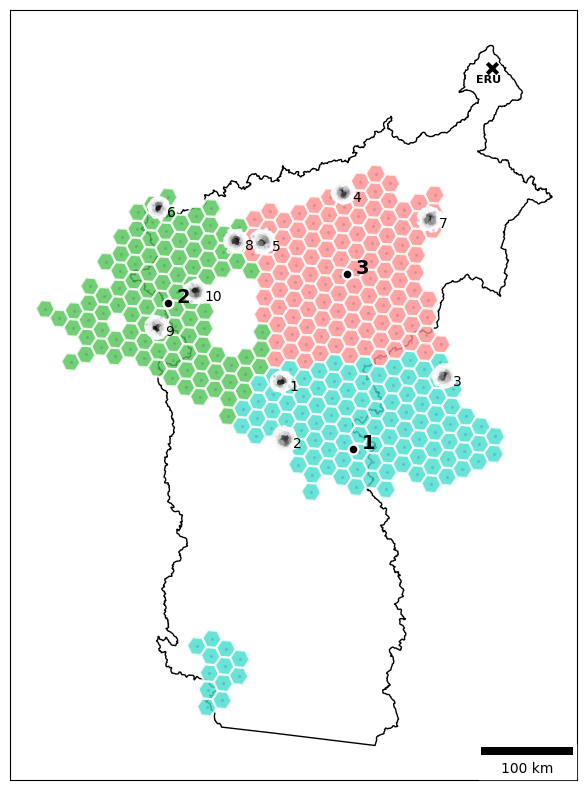

In [ ]:
from sklearn.cluster import KMeans

# Plota cada hexágono com a cor correspondente ao seu cluster
fig, axs = plt.subplots(figsize=(10,10))

# Cria um array com as coordenadas dos centros dos hexágonos
hex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])

# Define o número de clusters como 3
kmeans = KMeans(n_clusters=3, random_state=42).fit(hex_centers)

##A2E602

# Cria uma lista com as cores para cada cluster
#colors = ['#FF6633', '#b2f302','#05cdf3','#2045f3','#a58355','#ac6526','#9D7455','#640779','#6A0979','#66CCFF','#1eba92','#04d2ba', '#66FF66', '#A2E602', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#CC0099', '#9999FF']
colors = ['#04d2ba', '#15B01A','#FF6666','#FF4500','#2045f3','#1C86EE','#C8753A','#9D7455','#E206FC','#1eba92','#6A0979','#F80A0A', '#66FF66', '#05cdf3', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#FF6633', '#9999FF']

# Cria uma lista de listas para guardar os índices dos hexágonos de cada cluster
cluster_indices = [[] for i in range(kmeans.n_clusters)]

########################################################################################
# Encontra o centroide de cada cluster
cluster_centers = kmeans.cluster_centers_

# Imprime os centroides de cada cluster
for i, center in enumerate(cluster_centers):
    print(f"Centroide do cluster {i+1}: ({center[0]}, {center[1]})")

for i in range(dc_hex_large.size):
    cluster_label = kmeans.labels_[i]

    # Adiciona o índice do hexágono à lista correspondente ao seu cluster
    cluster_indices[cluster_label].append(i)

for i, indices in enumerate(cluster_indices):
    # Selecionar as geometrias dos hexágonos no cluster atual
    cluster_hexagons = dc_hex_large.iloc[indices]

    # Calcular os centros dos hexágonos e adicioná-los à lista
    cluster_hex_centers.append(cluster_hexagons.centroid.values)

########################################################################################

# Define a quantidade de cinza a ser adicionada
gray_value = 0.25

# Suaviza cada cor adicionando a quantidade de cinza definida
smooth_colors = []
for color in colors:
    rgb = mcolors.to_rgb(color)
    smoothed_rgb = tuple([(1 - gray_value) * c + gray_value for c in rgb])
    smooth_colors.append(smoothed_rgb)

#axs.set_title('Unidades de Conservação \n Altamira - PA')
axs.add_artist(ScaleBar(1, location='lower right'))

base= gdf_muni.plot(ax=axs, color='white', edgecolor='black')
#dc_hex_large.plot(ax=axs, alpha=0.7, linewidth=1.6, edgecolor='white')

plt.scatter(zorder=10, *zip(*list_centers), color='#0c0096', s=2, alpha=0.1) # plot dos centros dos hexagonos

#ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)

for i in range(dc_hex_large.size):
    hex_coords = list(dc_hex_large["geometry"][i].exterior.coords)
    x = [coord[0] for coord in hex_coords]
    y = [coord[1] for coord in hex_coords]
    cluster_label = kmeans.labels_[i]
    axs.fill(x, y, color=smooth_colors[cluster_label], alpha=0.8, linewidth=1.6, edgecolor='white')

# Encontra o centro mais adequado de cada grupo e plota um ponto
for label in set(kmeans.labels_):
    group_hex_centers = hex_centers[kmeans.labels_ == label]
    group_center = np.mean(group_hex_centers, axis=0)
    axs.scatter(group_center[0], group_center[1], marker='o', s=50, color='k', edgecolor='white', linewidth=1.6)

    # Adiciona o número do grupo como label numérica ao lado do centro mais adequado
    axs.annotate(str(label+1), xy=(group_center[0], group_center[1]), xytext=(group_center[0]+10000, group_center[1]), color='k', fontsize=14, fontweight='bold')

# Adiciona o número de hexágonos em cada grupo
counts = [sum(kmeans.labels_ == i) for i in range(len(smooth_colors))]
for i, count in enumerate(counts):
    print(f'Grupo {i+1}: {count} hexágonos')

# Adiciona o ponto da estação urbana
eru_point = [2.39e6, -0.37e6]
axs.scatter(eru_point[0], eru_point[1], marker='X', s=120, color='black', edgecolor='white', linewidth=1)
axs.annotate(str('ERU'), xy=(eru_point[0], eru_point[1]), xytext=(eru_point[0]-17000, eru_point[1]-17000), color='k', fontsize=8, fontweight='bold')

# Remover os números e tracinhos dos eixos x e y
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

for smoke_data in smoke_data_list:
    plt.scatter(smoke_data['x_coords'], smoke_data['y_coords'], c=smoke_data['intensities'], s=8, cmap='gist_yarg', alpha=0.7)

for cluster_coordinates in all_drones_coordinates:
    #print("Cluster Coordinates:")
    for drone_coordinates in cluster_coordinates:
        #print(f"x: {drone_coordinates['x']}, y: {drone_coordinates['y']}")
        #axs.scatter(drone_coordinates['x'], drone_coordinates['y'], color='k', marker='X', s=20, alpha=0.7)    # printa o x nos drones
        pass
    print()  # Linha em branco para separar os clusters

# Plote os "X" e rótulos nas coordenadas dos drones
for i in range(len(all_drones_coordinates)):
  for drone_coord in all_drones_coordinates[i]:
      x, y = drone_coord['x'], drone_coord['y']
      #plt.scatter(x, y, marker='X', s=15, color='black', edgecolor='white', linewidth=1)
  plt.annotate(f'{i+1}', xy=(drone_coord['x'], drone_coord['y']), xytext=(drone_coord['x']+10000, drone_coord['y']-10000), color='k', fontsize=10)

###########################################################################################################################################################################

# codigo para zoom
'''
random_drone_coordinates = all_drones_coordinates[random_cluster]               # Obtenha as coordenadas dos drones no cluster randômico
x_center_list = [drone_coord['x'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas x dos drones no cluster randômico
y_center_list = [drone_coord['y'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas y dos drones no cluster randômico


# Plot dos drones do enxame no gráfico das células (Enxame em destaque)
for i in range(len(x_center_list)):
    plt.scatter(x_center_list[i], y_center_list[i], marker="x", color='red', s=2)
    plt.plot(desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[0],
             desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[1], color='blue')

# Configurar a área de zoom no gráfico
#axins = zoomed_inset_axes(axs, zoom=21, loc='upper right',
#                          axes_kwargs={"facecolor": "white"}, bbox_to_anchor=(1000, 880), borderpad=0)

axins = zoomed_inset_axes(axs, zoom=10, loc='upper left',
                          axes_kwargs={"facecolor": "white"})

# Remover os números e tracinhos dos eixos x e y
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

# Formatar os eixos da área de zoom
#axins.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#axins.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#plt.xticks(rotation='vertical')

# Ajustar o número de ticks nos eixos da área de zoom
#axins.yaxis.get_major_locator().set_params(nbins=8)
#axins.xaxis.get_major_locator().set_params(nbins=8)

# Coordenadas do enxame no plot da área ampliada
for i in range(len(x_center_list)):
    x = x_center_list[i]
    y = y_center_list[i]
    axins.plot(x, y, marker="x", markersize=7, color="red", markeredgecolor="red", alpha=0.77, markeredgewidth=2)
    axins.plot(desenhar_circunferencia(x, y, drones_distance / 2)[0],
               desenhar_circunferencia(x, y, drones_distance / 2)[1], color='blue')
    #axins.text(x, y - 125, f'D{i + 1}', fontsize=13, color='darkred')

adjust = 3100  # ajuste do quadrado entorno do enxame

# Definir os limites dos eixos da área de zoom
x1, x2, y1, y2 = (min(x_center_list) - adjust), (max(x_center_list) + adjust), (max(y_center_list) + adjust), (min(y_center_list) - adjust)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Encontre o índice do cluster selecionado e acesse os dados de fumaça correspondentes
selected_cluster_index = all_drones_coordinates.index(random_drone_coordinates)
selected_smoke_data = smoke_data_list2[selected_cluster_index]

# Plote a nuvem de fumaça do cluster selecionado no gráfico de zoom
axins.scatter(selected_smoke_data["x_coords"], selected_smoke_data["y_coords"], c=selected_smoke_data["intensities"], s=10, cmap="gist_yarg", alpha=0.7)

# Marcar a área de zoom no gráfico principal
pp, p1, p2 = mark_inset(axs, axins, loc1=4, loc2=3, fc="none", ec="0.5")
pp.set_fill(False)
pp.set_facecolor("white")
pp.set_edgecolor("black")
'''

plt.savefig("com_knn_3.png", dpi=500, bbox_inches="tight")

###########################################################################################################################################################################

for cluster_coordinates in all_drones_coordinates:
    for drone_coordinates in cluster_coordinates:
        x_coord = drone_coordinates['x']
        y_coord = drone_coordinates['y']
        cluster_label = kmeans.predict([[x_coord, y_coord]])[0]

        # Imprimir as coordenadas do drone e o número do cluster previsto
        print(f"Coordenadas: x={x_coord}, y={y_coord} | Cluster: {cluster_label+1} | Hexágonos: {cluster_indices[cluster_label]}")

        #axs.scatter(x_coord, y_coord, color=smooth_colors[cluster_label], marker='X', s=20, alpha=0.7)


        # Você pode adicionar o número do cluster como um texto no próprio gráfico
        #axs.annotate(str(cluster_label), xy=(x_coord, y_coord), xytext=(x_coord + 5000, y_coord - 5000), color='k', fontsize=10, fontweight='bold')

    print()  # Linha em branco para separar os clusters


plt.show()

In [ ]:
'''import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap

# Suponha que você já tenha o DataFrame com as geometrias hexagonais dc_hex_large

# Cria um array com as coordenadas dos centros dos hexágonos
hex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])

# Define o número de clusters como 3
kmeans = KMeans(n_clusters=3, random_state=42).fit(hex_centers)

# Adiciona a coluna 'cluster' ao DataFrame original
dc_hex_large['cluster'] = kmeans.labels_

# Define as cores desejadas
custom_colors = ['#15B01A', '#1C86EE', '#FF4500']

# Cria um mapa de cores personalizado
cmap = ListedColormap(custom_colors)

# Plota cada hexágono
fig, axs = plt.subplots(figsize=(6, 6))
#dc_hex_large.plot(ax=axs, edgecolor='black', color='white')

# Plota as bolinhas nos centros dos hexágonos com cores correspondentes aos clusters
#scatter = axs.scatter(hex_centers[:, 0], hex_centers[:, 1], c=kmeans.labels_, cmap=cmap, s=20,  linewidth=1)

# Adiciona uma legenda para os clusters
legend_labels = {0: '1', 1: '2', 2: '3'}
scatter = axs.scatter(hex_centers[:, 0], hex_centers[:, 1], c=kmeans.labels_, cmap=cmap, s=17, linewidth=1)
axs.legend(handles=scatter.legend_elements()[0], title='Grupos', labels=legend_labels.values(), fontsize=16, title_fontsize=16, loc='lower right')

#axs.grid(True)
# Aumenta o tamanho dos números nos eixos x e y
axs.tick_params(axis='both', which='major', labelsize=17)
axs.yaxis.get_offset_text().set_fontsize(17)
axs.xaxis.get_offset_text().set_fontsize(17)

plt.savefig('scatterplot1.png', dpi=100)

#plt.title('Bolinhas nos Centros dos Hexágonos com Cores Correspondentes aos Clusters')
plt.show()'''


"import matplotlib.pyplot as plt\nfrom sklearn.cluster import KMeans\nimport geopandas as gpd\nimport numpy as np\nfrom matplotlib.colors import ListedColormap\n\n# Suponha que você já tenha o DataFrame com as geometrias hexagonais dc_hex_large\n\n# Cria um array com as coordenadas dos centros dos hexágonos\nhex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])\n\n# Define o número de clusters como 3\nkmeans = KMeans(n_clusters=3, random_state=42).fit(hex_centers)\n\n# Adiciona a coluna 'cluster' ao DataFrame original\ndc_hex_large['cluster'] = kmeans.labels_\n\n# Define as cores desejadas\ncustom_colors = ['#15B01A', '#1C86EE', '#FF4500']\n\n# Cria um mapa de cores personalizado\ncmap = ListedColormap(custom_colors)\n\n# Plota cada hexágono\nfig, axs = plt.subplots(figsize=(6, 6))\n#dc_hex_large.plot(ax=axs, edgecolor='black', color='white')\n\n# Plota as bolinhas nos centros dos hexágonos com cores correspondentes aos clusters\n#scatter = axs.scatt

Grupo 1 contém 112 hexágonos
Grupo 2 contém 112 hexágonos
Grupo 3 contém 112 hexágonos


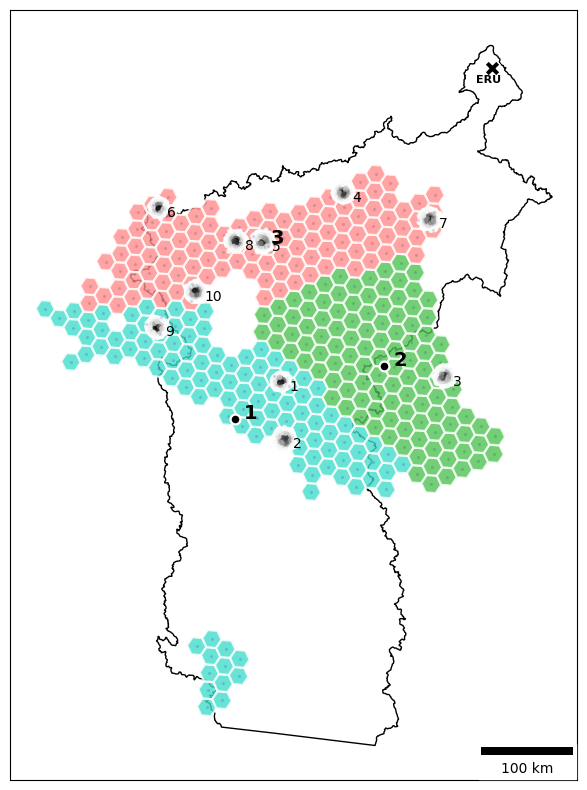

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from scipy.spatial import distance
from shapely.geometry import Point, MultiPoint
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

n_groups = 3

ref_point = [2109623.20981436, -629660.17175392]

ref_distance = 500

# Plota cada hexágono com a cor correspondente ao seu grupo
fig, axs = plt.subplots(figsize=(10,10))

base= gdf_muni.plot(ax=axs, color='white', edgecolor='black')

plt.scatter(zorder=10, *zip(*list_centers), color='#0c0096', s=2, alpha=0.1) # plot dos centros dos hexagonos

# Cria um array com as coordenadas dos centros dos hexágonos
hex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])

# Suponha que você tenha os centros dos hexágonos em 'hex_centers'

# Calcule o ponto médio (centroide) dos centros dos hexágonos
central_point = np.mean(hex_centers, axis=0)

# Calcule os ângulos em relação ao ponto central
angles = np.arctan2(hex_centers[:, 1] - ref_point[1], hex_centers[:, 0] - ref_point[0])

# Ordena os hexágonos pela coordenada x
ordered_hex_centers = hex_centers[np.argsort(angles)]

# Divide os hexágonos em n grupos com tamanhos aproximadamente iguais
group_sizes = [len(ordered_hex_centers) // n_groups] * n_groups
for i in range(len(ordered_hex_centers) % n_groups):
    group_sizes[i] += 1

# Define as cores para cada grupo
#colors = list(mcolors.TABLEAU_COLORS.values())  # Usa as cores da tabela Tableau
colors = ['#04d2ba', '#15B01A','#FF6666','#FF4500','#2045f3','#1C86EE','#C8753A','#9D7455','#E206FC','#1eba92','#6A0979','#F80A0A', '#66FF66', '#05cdf3', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#FF6633', '#9999FF']
# Define a quantidade de cinza a ser adicionada
gray_value = 0.25

# Suaviza cada cor adicionando a quantidade de cinza definida
smooth_colors = []
for color in colors:
    rgb = mcolors.to_rgb(color)
    smoothed_rgb = tuple([(1 - gray_value) * c + gray_value for c in rgb])
    smooth_colors.append(smoothed_rgb)

# Plota os hexágonos e pinta cada grupo com uma cor diferente
group_centers = []
start = 0
for i, size in enumerate(group_sizes):
    end = start + size
    group_center = ordered_hex_centers[start:end]
    group_centers.append(group_center)

    for center in group_center:
        hex_idx = np.where((hex_centers == center).all(axis=1))[0][0]
        hex_coords = list(dc_hex_large["geometry"][hex_idx].exterior.coords)
        x = [coord[0] for coord in hex_coords]
        y = [coord[1] for coord in hex_coords]
        axs.fill(x, y, color=smooth_colors[i % len(smooth_colors)], linewidth=1.6, edgecolor='white', alpha=0.8)

    start = end

# Adiciona o ponto da estação urbana
eru_point = [2.39e6, -0.37e6]
axs.scatter(eru_point[0], eru_point[1], marker='X', s=120, color='black', edgecolor='white', linewidth=1)
axs.annotate(str('ERU'), xy=(eru_point[0], eru_point[1]), xytext=(eru_point[0]-17000, eru_point[1]-17000), color='k', fontsize=8, fontweight='bold')

array_drones = []   # Lista para armazenar as coordenadas de todos os drones em cada cluster

centers_groups = []

# Encontra o centro mais adequado de cada grupo e plota um ponto
for i, group_center in enumerate(group_centers):
    center = np.mean(group_center, axis=0)
    axs.scatter(center[0], center[1], marker='o', s=50, color='k', edgecolor='white', linewidth=1.6)
    axs.annotate(f'{i+1}', xy=(center[0], center[1]), xytext=(center[0]+10000, center[1]), color='k', fontsize=14, fontweight='bold')
    centers_groups.append(center)

# Divide os hexágonos em n_groups grupos
groups = np.array_split(ordered_hex_centers, n_groups)

for i, group_centers in enumerate(groups):
  # Imprime o número de hexágonos em cada grupo
  print(f"Grupo {i+1} contém {len(group_centers)} hexágonos")

# Remover os números e tracinhos dos eixos x e y
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

# Adiciona a escala ao gráfico
scalebar = ScaleBar(1, location='lower right')
axs.add_artist(scalebar)


for smoke_data in smoke_data_list:
    plt.scatter(smoke_data['x_coords'], smoke_data['y_coords'], c=smoke_data['intensities'], s=8, cmap='gist_yarg', alpha=0.7)

# Plote os "X" e rótulos nas coordenadas dos drones
for i in range(len(all_drones_coordinates)):
  for drone_coord in all_drones_coordinates[i]:
      x, y = drone_coord['x'], drone_coord['y']
      #plt.scatter(x, y, marker='X', s=15, color='black', edgecolor='white', linewidth=1)
  plt.annotate(f'{i+1}', xy=(drone_coord['x'], drone_coord['y']), xytext=(drone_coord['x']+10000, drone_coord['y']-10000), color='k', fontsize=10) # plota o numero da fumaça no mapa

###########################################################################################################################################################################
# codigo para zoom
'''
#random_drone_coordinates = all_drones_coordinates[random_cluster]               # Obtenha as coordenadas dos drones no cluster randômico
x_center_list = [drone_coord['x'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas x dos drones no cluster randômico
y_center_list = [drone_coord['y'] for drone_coord in random_drone_coordinates]  # Lista de coordenadas y dos drones no cluster randômico


# Plot dos drones do enxame no gráfico das células (Enxame em destaque)
for i in range(len(x_center_list)):
    plt.scatter(x_center_list[i], y_center_list[i], marker="x", color='red', s=2)
    plt.plot(desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[0],
             desenhar_circunferencia(x_center_list[i], y_center_list[i], drones_distance / 2)[1], color='blue')

# Configurar a área de zoom no gráfico
#axins = zoomed_inset_axes(axs, zoom=21, loc='upper right',
#                          axes_kwargs={"facecolor": "white"}, bbox_to_anchor=(1000, 880), borderpad=0)

axins = zoomed_inset_axes(axs, zoom=10, loc='upper left',
                          axes_kwargs={"facecolor": "white"})

# Remover os números e tracinhos dos eixos x e y
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

# Formatar os eixos da área de zoom
#axins.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#axins.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#plt.xticks(rotation='vertical')

# Ajustar o número de ticks nos eixos da área de zoom
#axins.yaxis.get_major_locator().set_params(nbins=8)
#axins.xaxis.get_major_locator().set_params(nbins=8)

# Coordenadas do enxame no plot da área ampliada
for i in range(len(x_center_list)):
    x = x_center_list[i]
    y = y_center_list[i]
    axins.plot(x, y, marker="x", markersize=7, color="red", markeredgecolor="red", alpha=0.77, markeredgewidth=2)
    axins.plot(desenhar_circunferencia(x, y, drones_distance / 2)[0],
               desenhar_circunferencia(x, y, drones_distance / 2)[1], color='blue')
    #axins.text(x, y - 125, f'D{i + 1}', fontsize=13, color='darkred')

adjust = 3100  # ajuste do quadrado entorno do enxame

# Definir os limites dos eixos da área de zoom
x1, x2, y1, y2 = (min(x_center_list) - adjust), (max(x_center_list) + adjust), (max(y_center_list) + adjust), (min(y_center_list) - adjust)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Encontre o índice do cluster selecionado e acesse os dados de fumaça correspondentes
selected_cluster_index = all_drones_coordinates.index(random_drone_coordinates)
selected_smoke_data = smoke_data_list2[selected_cluster_index]

# Plote a nuvem de fumaça do cluster selecionado no gráfico de zoom
axins.scatter(selected_smoke_data["x_coords"], selected_smoke_data["y_coords"], c=selected_smoke_data["intensities"], s=10, cmap="gist_yarg", alpha=0.7)

# Marcar a área de zoom no gráfico principal
pp, p1, p2 = mark_inset(axs, axins, loc1=4, loc2=3, fc="none", ec="0.5")
pp.set_fill(False)
pp.set_facecolor("white")
pp.set_edgecolor("black")
'''

######################################################################################

'''
# Lista para armazenar os grupos correspondentes a cada ponto
group_indices = []

# Itere pelos pares ordenados (x, y)
for x, y in zip(x_center_list, y_center_list):
    # Calcule a distância euclidiana para todos os centros de grupos em centers_groups
    distances = [np.linalg.norm(np.array([x, y]) - center) for center in centers_groups]

    # Encontre o índice do centro do grupo mais próximo
    nearest_group_index = np.argmin(distances) + 1

    # Adicione o índice do grupo à lista
    group_indices.append(nearest_group_index)

# Agora, group_indices contém os índices dos grupos correspondentes a cada ponto com base na proximidade aos centros em centers_groups.

# Suponha que all_drones_coordinates[0] contém as coordenadas dos drones
drones_coordinates = all_drones_coordinates[0]
'''

plt.savefig("sem_knn_3.png", dpi=500, bbox_inches="tight")

In [ ]:
############# DIVISÃO NÃO UNIFORME #############

import numpy as np
import csv

# Suponha que você tenha uma lista chamada 'groups' contendo os ndarrays
# com as coordenadas x e y de cada cluster.

# Diretório onde você deseja salvar o arquivo CSV.
output_csv_file = 'clusters.csv'

# Inicialize uma lista vazia para armazenar todos os pontos.
all_points = []

# Percorra os grupos e extraia as coordenadas x e y e o número do cluster.
for cluster_num, group in enumerate(groups):
    for point in group:
        x, y = point
        # Adicione o ponto, as coordenadas x e y e o número do cluster à lista.
        all_points.append([x, y, cluster_num + 1])

# Agora, escreva os dados no arquivo CSV.
with open(output_csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['x', 'y', 'Grupos'])

    for point_data in all_points:
        csv_writer.writerow(point_data)

print(f'Dados salvos em {output_csv_file}')

Dados salvos em clusters.csv


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
dataset = pd.read_csv('clusters.csv')
dataset.head()

,x,y,Grupos
0,2.014002e+06,-630787.082335,1
1,1.903505e+06,-632789.817226,1
2,1.934777e+06,-634866.610885,1
3,2.045659e+06,-632876.562125,1
4,1.966158e+06,-636953.067953,1


In [ ]:
dataset['Grupos'].value_counts()

Grupos
1    112
2    112
3    112
Name: count, dtype: int64

In [ ]:
X = dataset.iloc[:,0:2].values
Y = dataset.iloc[:,2].values

In [ ]:
'''import seaborn as sns


# Configura o tamanho da figura
plt.figure(figsize=(6, 6))

scatter_plot = sns.scatterplot(x=dataset['x'],y=dataset['y'], hue=dataset['Grupos'], palette=['#15B01A', '#1C86EE', '#FF4500'])

scatter_plot.set(xlabel='',ylabel='')

# Aumenta o tamanho dos números nos eixos x e y
plt.tick_params(axis='both', which='major', labelsize=17)
plt.setp(scatter_plot.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(scatter_plot.get_legend().get_title(), fontsize='16') # for legend title

scatter_plot.yaxis.get_offset_text().set_fontsize(17)
scatter_plot.xaxis.get_offset_text().set_fontsize(17)

plt.savefig('scatterplot2.png', dpi=100)'''

"import seaborn as sns\n\n\n# Configura o tamanho da figura\nplt.figure(figsize=(6, 6))\n\nscatter_plot = sns.scatterplot(x=dataset['x'],y=dataset['y'], hue=dataset['Grupos'], palette=['#15B01A', '#1C86EE', '#FF4500'])\n\nscatter_plot.set(xlabel='',ylabel='')\n\n# Aumenta o tamanho dos números nos eixos x e y\nplt.tick_params(axis='both', which='major', labelsize=17)\nplt.setp(scatter_plot.get_legend().get_texts(), fontsize='16') # for legend text\nplt.setp(scatter_plot.get_legend().get_title(), fontsize='16') # for legend title\n\nscatter_plot.yaxis.get_offset_text().set_fontsize(17)\nscatter_plot.xaxis.get_offset_text().set_fontsize(17)\n\nplt.savefig('scatterplot2.png', dpi=100)"

In [ ]:
# Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [ ]:
# Create a function for the models
def models(X_train, Y_train):

  # k-Nearest Neighbor Classifier (kNN)
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  print('k-Nearest Neighbor Classifier Training Accuracy: ', knn.score(X_train, Y_train));

  return knn

In [ ]:
model = models(X_train, Y_train)

k-Nearest Neighbor Classifier Training Accuracy:  1.0


In [ ]:
cluster_prediction = model.predict(X_test)

print(cluster_prediction)

[1 1 3 3 2 3 1 3 1 1 1 1 1 2 1 2 1 1 3 1 2 3 3 2 3 3 3 1 3 3 1 2 1 2 3 2 1
 3 2 1 2 1 1 3 1 2 2 3 1 3 1 3 1 3 2 3 2 1 1 1 1 1 2 1 1 2 1 3 1 2 1 3 2 2
 2 2 3 2 3 2 1 3 1 3]


In [ ]:
drone_distances_ = {}
hex_distances_ = {}
gcps_ativas = []

for i in range(len(all_drones_coordinates)):
    print(f'Fumaça: {i + 1}: ')
    drone_distances_[i] = {}
    hex_distances_[i] = {}
    for aux, drone_coord in enumerate(all_drones_coordinates[i]):
        Z = drone_coord
        Z_array = np.array([[Z['x'], Z['y']]])

        # Faça previsões usando o modelo kNN treinado
        cluster_prediction = model.predict(Z_array)

        print(f'{cluster_prediction} {len(groups[cluster_prediction[0] - 1])} {centers_groups[cluster_prediction[0] - 1]}')
        gcps_ativas.append(cluster_prediction[0] - 1)

        drone_distances_[i][aux] = []  # Create a list for the current aux value
        hex_distances_[i][aux] = []    # Create a list for the current aux value

        # Append values to the lists for the current aux value
        for hex_centers in groups[cluster_prediction[0] - 1]:
            drone_to_hex_dist = calcDistance(hex_centers[0], hex_centers[1], Z['x'], Z['y'])
            hex_to_center_dist = calcDistance(hex_centers[0], hex_centers[1], centers_groups[cluster_prediction[0] - 1][0], centers_groups[cluster_prediction[0] - 1][1])

            drone_distances_[i][aux].append(drone_to_hex_dist)
            hex_distances_[i][aux].append(hex_to_center_dist)

Fumaça: 1: 
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
Fumaça: 2: 
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
[1] 112 [2110201.94045213 -752686.55873128]
Fumaça: 3: 
[2] 112 [2272368.39675295 -694846.66229639]
[2] 112 [2272368.39675295 -694846.66229639]
[2] 112 [2272368.39675295 -694846.66229639]
[2] 112 [2272368.39675295 -694846.66229639]
[2] 112 [2272368.39675295 -694846.66229639]
Fumaça: 4: 
[3] 112 [2138899.292238   -561447.29423409]
[3] 112 [2138899.292238   -561447.29423409]
[3] 112 [2138899.292238   -561447.29423409]
[3] 112 [2138899.292238   -561447.29423409]
[3] 112 [2138899.292238   -561447.29423409]
Fumaça: 5: 
[3] 112 [2138899.292238   -561447.29423409]
[3] 112 [2138899

Centroide do cluster 1: (2238876.2901131194, -785359.0267817164)
Centroide do cluster 2: (2036655.5157729913, -626523.9040740131)
Centroide do cluster 3: (2231808.987130117, -594282.4239805231)










Fumaça
Coordenadas: x=2160301.452576728, y=-711909.9224738962 | Cluster: 1 | Hexágonos: [0, 1, 4, 5, 9, 11, 13, 15, 16, 17, 20, 21, 22, 24, 25, 27, 29, 31, 34, 38, 46, 53, 54, 58, 65, 70, 74, 78, 84, 86, 88, 96, 99, 100, 102, 103, 106, 111, 114, 115, 116, 124, 126, 129, 130, 131, 132, 135, 136, 138, 142, 145, 147, 149, 153, 154, 158, 163, 164, 168, 169, 173, 174, 175, 177, 181, 188, 206, 209, 210, 213, 214, 215, 217, 218, 219, 220, 221, 225, 226, 227, 228, 236, 237, 242, 244, 248, 255, 257, 259, 260, 280, 286, 290, 291, 292, 294, 295, 298, 302, 306, 319, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335] | Cluster center: [2238876.29011312 -785359.02678172]
Coordenadas: x=2160301.452576728, y=-712409.9224738962 | Cluster: 1 | Hexágonos: [0, 1, 4, 5, 9, 11, 13, 15, 16, 17,

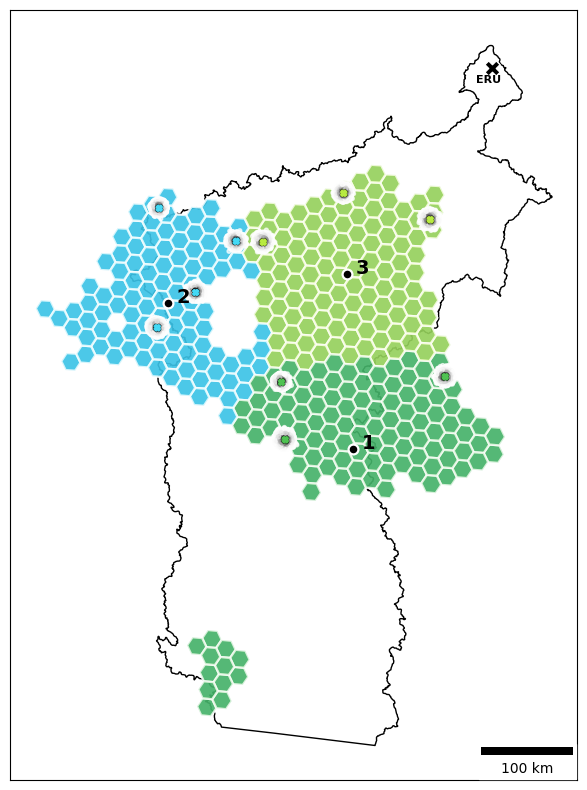

In [ ]:
from sklearn.cluster import KMeans
import json

# Plota cada hexágono com a cor correspondente ao seu cluster
fig, axs = plt.subplots(figsize=(10,10))

# Cria um array com as coordenadas dos centros dos hexágonos
hex_centers = np.array([list(poly.centroid.coords)[0] for poly in dc_hex_large.geometry])

# Define o número de clusters como 3
kmeans = KMeans(n_clusters=3, random_state=42).fit(hex_centers)

##A2E602

# Cria uma lista com as cores para cada cluster
#colors = ['#FF6633', '#b2f302','#05cdf3','#2045f3','#a58355','#ac6526','#9D7455','#640779','#6A0979','#66CCFF','#1eba92','#04d2ba', '#66FF66', '#A2E602', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#CC0099', '#9999FF']
colors = ['#15B01A', '#05cdf3','#A2E602','#04d2ba','#2045f3','#ac6526','#9999FF','#9D7455','#640779','#1eba92','#6A0979','#a58355', '#66FF66', '#05cdf3', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#FF6633', '#9999FF']
#colors = ['#CC0099', '#05cdf3','#A2E602','#a58355','#2045f3','#ac6526','#66CCFF','#9D7455','#640779','#1eba92','#6A0979','#04d2ba', '#66FF66', '#05cdf3', '#F80A0A', '#1F53F3', '#d215fc', '#C8753A', '#E206FC', '#FF6666', '#FFCC00', '#DD2979', '#FFCC00', '#FF6633', '#9999FF']

# Cria uma lista de listas para guardar os índices dos hexágonos de cada cluster
cluster_indices = [[] for i in range(kmeans.n_clusters)]

########################################################################################
# Encontra o centroide de cada cluster
cluster_centers = kmeans.cluster_centers_

# Imprime os centroides de cada cluster
for i, center in enumerate(cluster_centers):
    print(f"Centroide do cluster {i+1}: ({center[0]}, {center[1]})")

for i in range(dc_hex_large.size):
    cluster_label = kmeans.labels_[i]

    # Adiciona o índice do hexágono à lista correspondente ao seu cluster
    cluster_indices[cluster_label].append(i)

for i, indices in enumerate(cluster_indices):
    # Selecionar as geometrias dos hexágonos no cluster atual
    cluster_hexagons = dc_hex_large.iloc[indices]

    # Calcular os centros dos hexágonos e adicioná-los à lista
    cluster_hex_centers.append(cluster_hexagons.centroid.values)

########################################################################################

# Define a quantidade de cinza a ser adicionada
gray_value = 0.25

# Suaviza cada cor adicionando a quantidade de cinza definida
smooth_colors = []
for color in colors:
    rgb = mcolors.to_rgb(color)
    smoothed_rgb = tuple([(1 - gray_value) * c + gray_value for c in rgb])
    smooth_colors.append(smoothed_rgb)

#axs.set_title('Unidades de Conservação \n Altamira - PA')
axs.add_artist(ScaleBar(1, location='lower right'))

base= gdf_muni.plot(ax=axs, color='white', edgecolor='black')
dc_hex_large.plot(ax=axs, alpha=0.7, linewidth=1.6, edgecolor='white')

#ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)

for i in range(dc_hex_large.size):
    hex_coords = list(dc_hex_large["geometry"][i].exterior.coords)
    x = [coord[0] for coord in hex_coords]
    y = [coord[1] for coord in hex_coords]
    cluster_label = kmeans.labels_[i]
    axs.fill(x, y, color=smooth_colors[cluster_label], alpha=0.7, linewidth=1.6, edgecolor='white')

# Encontra o centro mais adequado de cada grupo e plota um ponto
for label in set(kmeans.labels_):
    group_hex_centers = hex_centers[kmeans.labels_ == label]
    group_center = np.mean(group_hex_centers, axis=0)
    axs.scatter(group_center[0], group_center[1], marker='o', s=50, color='k', edgecolor='white', linewidth=1.6)

    # Adiciona o número do grupo como label numérica ao lado do centro mais adequado
    axs.annotate(str(label+1), xy=(group_center[0], group_center[1]), xytext=(group_center[0]+10000, group_center[1]), color='k', fontsize=14, fontweight='bold')

# Adiciona o número de hexágonos em cada grupo
#counts = [sum(kmeans.labels_ == i) for i in range(len(smooth_colors))]
#for i, count in enumerate(counts):
#    print(f'Grupo {i+1}: {count} hexágonos')

# Adiciona o ponto da estação urbana
eru_point = [2.39e6, -0.37e6]
axs.scatter(eru_point[0], eru_point[1], marker='X', s=120, color='black', edgecolor='white', linewidth=1)
axs.annotate(str('ERU'), xy=(eru_point[0], eru_point[1]), xytext=(eru_point[0]-17000, eru_point[1]-17000), color='k', fontsize=8, fontweight='bold')

# Remover os números e tracinhos dos eixos x e y
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)

for smoke_data in smoke_data_list:
    plt.scatter(smoke_data['x_coords'], smoke_data['y_coords'], c=smoke_data['intensities'], s=8, cmap='gist_yarg', alpha=0.7)

for cluster_coordinates in all_drones_coordinates:
    #print("Cluster Coordinates:")
    for drone_coordinates in cluster_coordinates:
        #print(f"x: {drone_coordinates['x']}, y: {drone_coordinates['y']}")
        axs.scatter(drone_coordinates['x'], drone_coordinates['y'], color='k', marker='X', s=20, alpha=0.7)
        #pass
    print()  # Linha em branco para separar os clusters

cluster_distances = []
gcps_total = []

for cluster_coordinates in all_drones_coordinates:
    print(f"Fumaça")

    drone_distances_list = [{}, {}, {}, {}, {}]
    hex_distances = {}

    for drone_id, drone_coordinates in enumerate(cluster_coordinates):

        x_coord = drone_coordinates['x']
        y_coord = drone_coordinates['y']
        cluster_label = kmeans.predict([[x_coord, y_coord]])[0]

        # Imprimir as coordenadas do drone e o número do cluster previsto
        print(f"Coordenadas: x={x_coord}, y={y_coord} | Cluster: {cluster_label+1} | Hexágonos: {cluster_indices[cluster_label]} | Cluster center: {cluster_centers[cluster_label]}")

        gcps_total.append(cluster_label)

        axs.scatter(x_coord, y_coord, color=smooth_colors[cluster_label], marker='X', s=15, alpha=0.7)
        cluster_center = Point(cluster_centers[cluster_label][0], cluster_centers[cluster_label][1])    # Centroide onde cada drone esta

        for k in range(counts[cluster_label]):

          hex_key = f"G{cluster_indices[cluster_label][k]}"
          #print(f"{hex_key}")
          receba = dc_hex_large["geometry"][cluster_indices[cluster_label][k]].centroid.coords[0]
          #print(f"{hex_key}: {receba[0]} {receba[1]}")

          #distance = calcDistance(x_coord, y_coord, receba[0], receba[1])     # calcDistance(receba[0], receba[1], cluster_center.x, cluster_center.y) // distancia hexagonos-centroide_cluster
          distance = calcDistance(receba[0], receba[1], cluster_center.x, cluster_center.y)
          hex_distances[hex_key] = distance

          #distance_drone = calcDistance(x_coord, y_coord, cluster_center.x, cluster_center.y)   # calcDistance(x_coord, y_coord, receba[0], receba[1])  // distancia drones-centro_hexagonos
          distance_drone = calcDistance(x_coord, y_coord, receba[0], receba[1])
          drone_distances_list[drone_id][hex_key] = distance_drone

        #print(hex_distances)



        # Você pode adicionar o número do cluster como um texto no próprio gráfico
        #axs.annotate(str(cluster_label), xy=(x_coord, y_coord), xytext=(x_coord + 5000, y_coord - 5000), color='k', fontsize=10, fontweight='bold')

    # Adiciona os dicionários de distâncias à lista principal
    cluster_distances.append({"drone_distances": drone_distances_list, "hex_distances": hex_distances})
    print()  # Linha em branco para separar os clusters

soma = 0

# Para cada cluster
for i, cluster in enumerate(cluster_distances):
    print(f"Incêndio {i+1}:")

    # Para cada drone
    for k, drone_distances in enumerate(cluster["drone_distances"]):
        #print(f"  Drone {k+1}:")

        # Cria o grafo ponderado com as distâncias do drone para cada gateway (hexágono)
        graph = {'drone': {}}
        for hex_key, dist in drone_distances.items():
            graph['drone'][hex_key] = dist

        # Adiciona as distâncias dos gateways (hexágonos) até o centróide (GCP)
        for hex_key, dist in cluster["hex_distances"].items():
            graph[hex_key] = {'GCP': dist}

        # Adiciona o GCP ao grafo
        graph['GCP'] = {}

        # Encontra o menor caminho usando o algoritmo de Bellman-Ford
        cost, path = bellman_ford(graph, 'drone', 'GCP')
        gateway = path[-2]

        # Acessa as distâncias do drone até o gateway e do gateway até o GCP
        dist_drone_to_gateway = graph['drone'][gateway]
        dist_gateway_to_GCP = graph[gateway]['GCP']

        # Exibe as distâncias
        print("Distância do drone até o gateway:", dist_drone_to_gateway)
        print("Distância do gateway até o GCP:", dist_gateway_to_GCP)

        #print(f'Drone {k+1} : SNR = {calcSNR(cost, array_freqs[i]):.2f} dB')

        soma += calcSNR(cost, array_freqs[i])

        #print(f"    Menor caminho: {path}")
        #print(f"    Gateway: {gateway}")
        #print(f"    Custo total do caminho: {cost}")
    print()

print(f"Soma: {soma} / Média SNR: {soma/(5*len(array_freqs)):.2f}")


# print no formato JSON
# Create a dictionary to hold the results
results = {}

# For each cluster
for i, cluster in enumerate(cluster_distances):
    incident_results = {}

    # For each drone
    for k, drone_distances in enumerate(cluster["drone_distances"]):
        # Create the weighted graph with distances from the drone to each gateway (hexagon)
        graph = {'drone': {}}
        for hex_key, dist in drone_distances.items():
            graph['drone'][hex_key] = dist

        # Add distances from gateways (hexagons) to the centroid (GCP)
        for hex_key, dist in cluster["hex_distances"].items():
            graph[hex_key] = {'GCP': dist}

        # Add the GCP to the graph
        graph['GCP'] = {}

        # Find the shortest path using the Bellman-Ford algorithm
        cost, path = bellman_ford(graph, 'drone', 'GCP')
        gateway = path[-2]

        incident_results[f"Drone_{k+1}"] = calcSNR(cost, array_freqs[i])

    results[f"incendio_{i + 1}"] = incident_results


# Convert the dictionary to JSON format
json_results = json.dumps(results, indent=4)

# Print the JSON
print(json_results)


unique_gcps = list(set(gcps_total))
snr_eru_medias = []

# Para cada cluster
for i in range(len(unique_gcps)):
    cluster_center = Point(cluster_centers[i][0], cluster_centers[i][1])
    distance = calcDistance(cluster_center.x, cluster_center.y, eru_point[0], eru_point[1])
    print(f"Distância do cluster {unique_gcps[i]+1} para a ERU: {distance:.2f}. SNR = {calcSNR(distance, 915e6)}")
    snr_eru_medias.append(calcSNR(distance, 915e6))

total = sum(snr_eru_medias) / len(snr_eru_medias)
print(f"Média ERU sinais = {total}")

plt.show()


In [ ]:
import numpy as np
import math
import pylab as pyl
from numpy.random import standard_normal
from numpy import sqrt
import csv
from google.colab import drive
drive.mount('/content/drive')

csv_paths = {
    1: '/content/drive/MyDrive/ber_n1.csv',
    2: '/content/drive/MyDrive/ber_n2.csv',
    3: '/content/drive/MyDrive/ber_n3.csv'
}

for csv_path in csv_paths.values():
    open(csv_path, 'w').close()

def count_different_bits(x, y):
    max_ = np.maximum(x, y)
    if(max_ != x):
        x, y = y, x
    count = 0
    while x:
        if x & 1 != y & 1:
            count += 1
        x >>= 1
        y >>= 1
    return count


test_points = 1e20
SFs = [7,8,9,10,11]
BW = 125000
T = 1/BW
M = 1

# Inicializando os dicionários
total_errors = {1: 0, 2: 0, 3: 0}
total_bits = {1: 0, 2: 0, 3: 0}

clusters = {
        "Incêndio_1": {
          "Drone_1": 9.33,
          "Drone_2": 9.46,
          "Drone_3": 9.18,
          "Drone_4": 9.58,
          "Drone_5": 9.08
        },
        "Incêndio_2": {
          "Drone_1": 3.68,
          "Drone_2": 3.55,
          "Drone_3": 3.81,
          "Drone_4": 3.60,
          "Drone_5": 3.74
        },
        "Incêndio_3": {
          "Drone_1": 4.53,
          "Drone_2": 4.67,
          "Drone_3": 4.40,
          "Drone_4": 4.62,
          "Drone_5": 4.44
        }
}


ber_antenas = [[] for _ in range(3)]

colors = ['blue', 'green', 'red']

#SNR_dBs2 = np.array([17.31, 16.44, 18.14, 18.20, 16.40])

EbN0dBs = np.arange(start=-35,stop = -5, step = 1) # Eb/N0 range in dB for simulation

for cluster_name, drones in clusters.items():
    SFs_index = 0  # reset the SFs_index for each cluster
    for drone_id, SNR in drones.items():
        SF = SFs[SFs_index]
        #SF = 7
        SFs_index += 1
        N_Symbols = 2 ** SF
        Ts = N_Symbols * T
        t = np.arange(0, Ts, T)
        k = (t/Ts)*N_Symbols
        base_down_chirp = 1/(math.sqrt(N_Symbols)) * pyl.e**(-1j * 2*math.pi * k * (k/N_Symbols))
        symbol = np.random.randint(100, size=M)

        for N in [1,2,3]:
            ber_data = []  # Lista para armazenar os dados da BER
            errors = 0
            for p in range(test_points):
                rx_matrix = np.zeros((N, M, N_Symbols), dtype=complex)
                channel_matrix = np.zeros((N, M), dtype=float)
                for nRx in range(N):
                    for nTx in range(M):
                        gamma = 10**(SNR/10)
                        lora_symbol = (pyl.e**(1j * 2*math.pi * pyl.mod((symbol[nTx] + k), N_Symbols) * (k/N_Symbols)))/(pyl.sqrt(N_Symbols))
                        P=sum(abs(lora_symbol)**2)/len(lora_symbol)
                        N0=P/gamma
                        n = sqrt(N0/2)*(standard_normal(len(t))+1j*standard_normal(len(t)))
                        h = 1/sqrt(2)*(standard_normal(1)+1j*standard_normal(1))
                        r = abs(h)*lora_symbol + n
                        rx_matrix[nRx][nTx] = np.conj(h)*r
                        channel_matrix[nRx][nTx] = abs(h)
                H_plus = np.linalg.pinv(channel_matrix)
                d = np.zeros((M,1,N_Symbols), dtype=complex)
                for a in range(M):
                    for b in range(N):
                        d[a] += H_plus[a][b]*rx_matrix[b][a]
                for x in range(M):
                    corrs = (d.reshape(M,N_Symbols)[x] * base_down_chirp)
                    freq = abs(np.fft.fft(corrs))**2
                    dv = np.argmax(freq)%N_Symbols
                    errors += count_different_bits(symbol[x], dv)
            ber = errors/(SF*test_points)

            # Após calcular a BER
            ber_data.append([cluster_name, SF, ber])

            # Salvar a BER no arquivo CSV correspondente
            with open(csv_paths[N], 'a', newline='') as csv_file:
                csv_writer = csv.writer(csv_file)
                csv_writer.writerows(ber_data)

            # Acumulando os erros e o total de bits
            total_errors[N] += errors
            total_bits[N] += SF*test_points

            print(f"Experimento para {cluster_name}, {drone_id}, {SNR} dB com SF de {SF} e {N} antenas realizado. Total de erros: {total_errors},  Total de bits{total_bits}")
            print(f"BER = {ber}")
            print(f"Erros = {errors}")
            print(f"Total bits enviados = {SF*test_points}")
            print()

            #plt.plot(SNR, ber, 'x-', color=colors[N - 1])
            #ber_antenas[N-1].append(ber)

    #axes = plt.gca()
    #axes.set_ylim([1e-15, 1e-3])
    #axes.set_xlim([15, 20])
    #plt.xscale('linear')
    #plt.yscale('log')
    #plt.ylabel('BER')
    #plt.xlabel('Signal to noise ratio, SNR (dB)')
    #plt.grid(True, which='both')
    #plt.title('BER performance for LoRa over AWGN channel')
    #plt.legend(loc = 'best')
    #plt.savefig("figure.png", dpi=1000)
    #plt.show()

# Imprimindo o total de erros e total de bits para cada caso
for N in [1,2,3]:
    print(f"Para N = {N}, total de erros = {total_errors[N]}, total de bits transmitidos = {total_bits[N]}")